# App or Website? That is the question!

## Project Summary

**Here, in this project I investigate different methods for linear regression based on a fictional eCommerce company based in New York City that sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

**The company is trying to decide whether to focus their efforts on their mobile app experience or their website. They've hired you on contract to help them figure it out! Let's get started!

(All the addresses and emails are fake)

### Step 1: Importing required libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Step 2: Reading the Data

I work with the Ecommerce Customers csv file from the company. It has Customer info, such as Email, Address, and their color Avatar. Then it also has numerical value columns:

* Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member. 


In [3]:
df = pd.read_csv('Ecommerce Customers')

In [4]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [5]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


### Step 3: Exploratory Data Analysis

**Let's explore the data!**


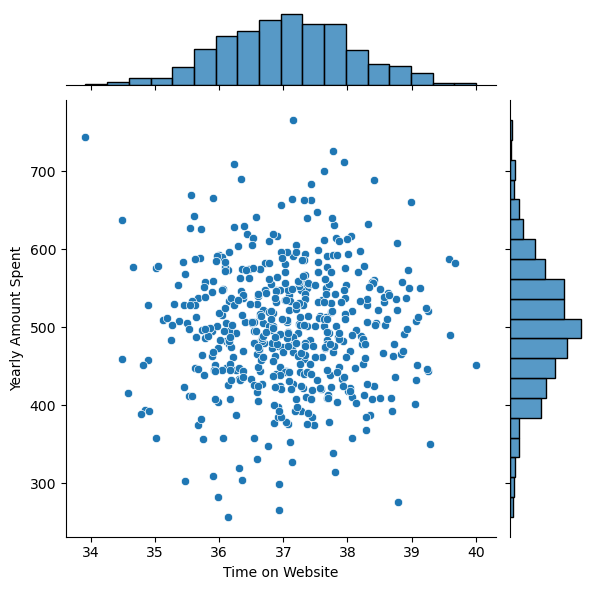

In [8]:
# I am curious if I can find a meaningful relationship between 'Time on Website' and 'Yearly Amount Spent'

sns.jointplot(x = 'Time on Website',y = 'Yearly Amount Spent', data = df)

**Both features have approximately normal distributions but they seem uncorrelated. I would try the same thing for Time on App**

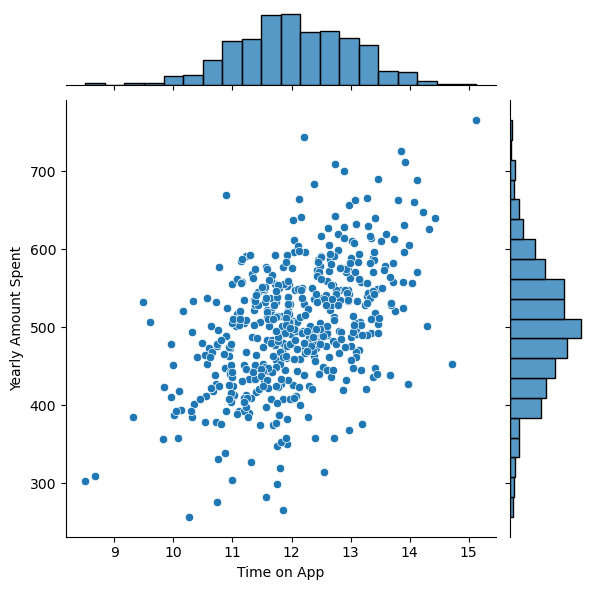

In [10]:
sns.jointplot(x='Time on App',y='Yearly Amount Spent',data=df)

**There seem to be a loosely linear correlation between these two features.**

**I now explore Time on App and Length of Membership.**

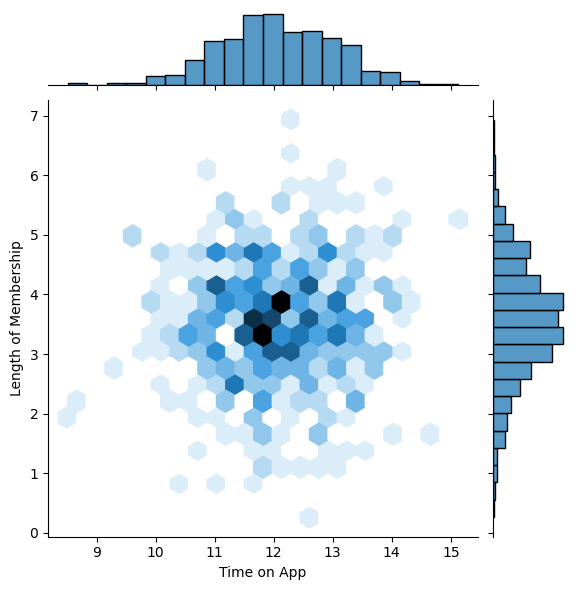

In [11]:
sns.jointplot(x='Time on App',y='Length of Membership',data=df, kind ='hex')

**I think a pairplot is much more helpful**

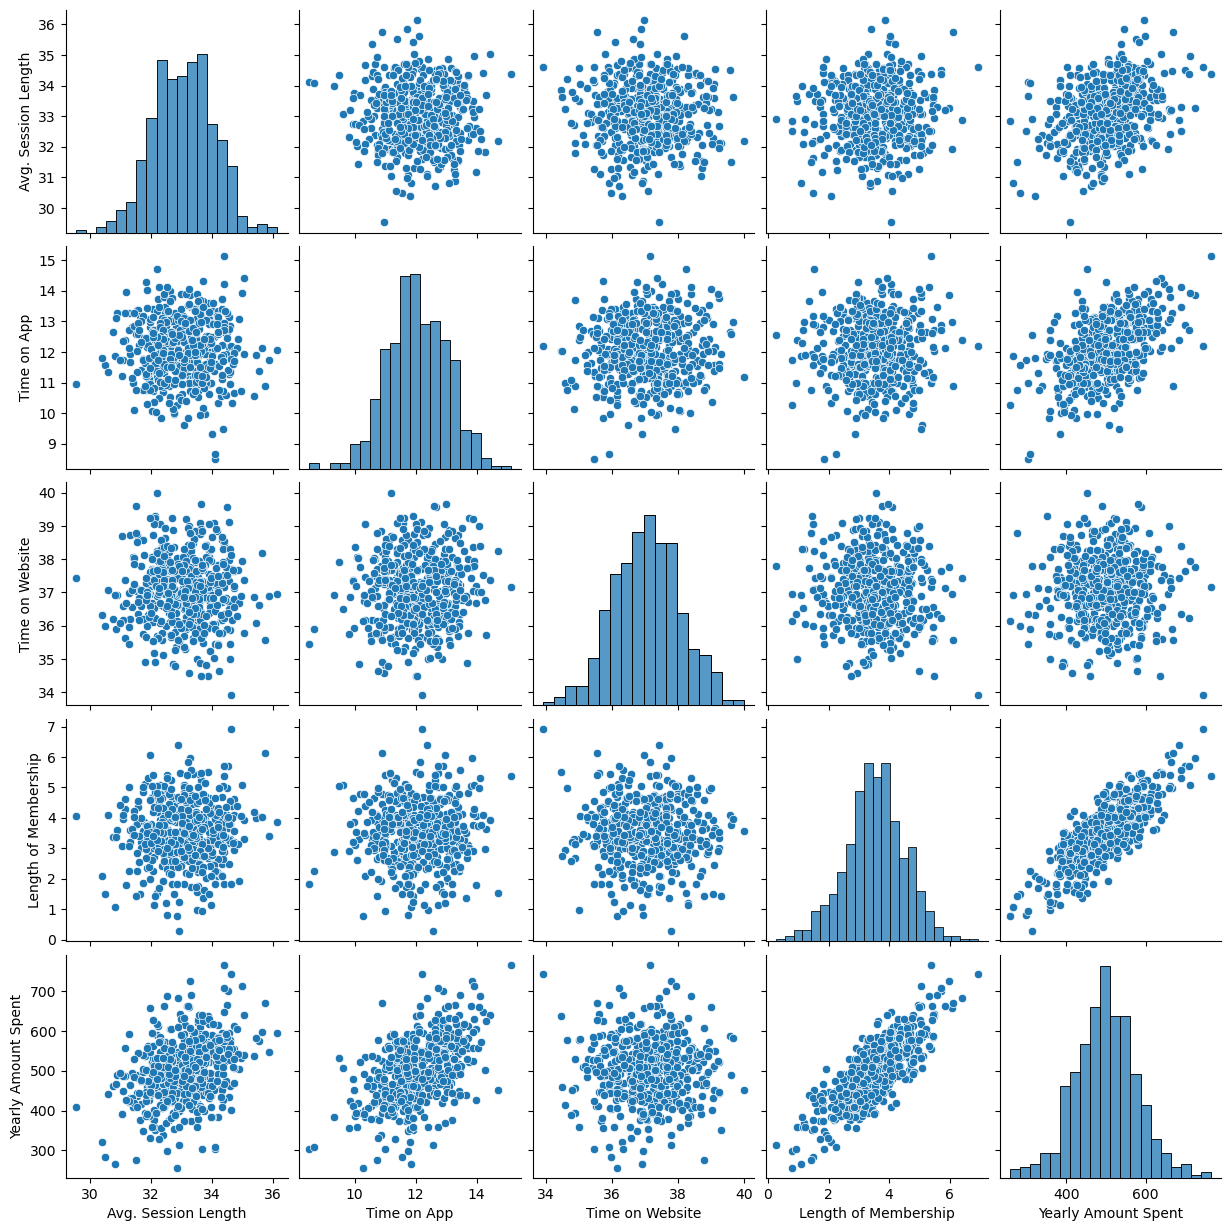

In [12]:
sns.pairplot(df)

**Based off this plot the most correlated feature with Yearly Amount Spent is 'Length of Membership'.**

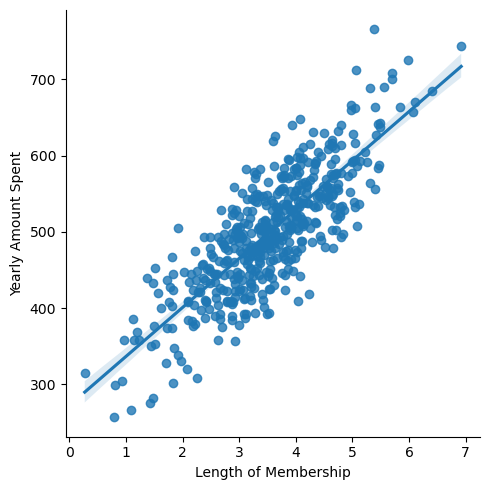

In [13]:
# I create a linear model plot for these two features in order to see the linear fit to the data.
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=df)

### Step 4: Training and Testing Data

**I define the training data as all the features except 'Yearly Amount Spent' and the target could be this last column**

In [14]:
from sklearn.model_selection import train_test_split

In [17]:
X = df[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]
y = df['Yearly Amount Spent']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

### Step 5: Models

### Model 1: Linear Regression

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
LR = LinearRegression()
LR.fit(X_train,y_train)
prediction_1 = LR.predict(X_test)

**Let's evaluate our linear model**

In [22]:
COEFFICIENTS = pd.DataFrame(LR.coef_,X.columns,columns=['coefficient'])

In [24]:
COEFFICIENTS

,coefficient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


**This data frame shows that roughly speaking one unit of increase in Avg. Session Length will lead to 25.981550 increase in total mony spent if everything else is kept fixed. Therefore, according to the coefficients above, Length of Membership is the most effective feature and 'Time on App' seems to not have very impact on the total money spent.**

Text(0, 0.5, 'Model Prediction')

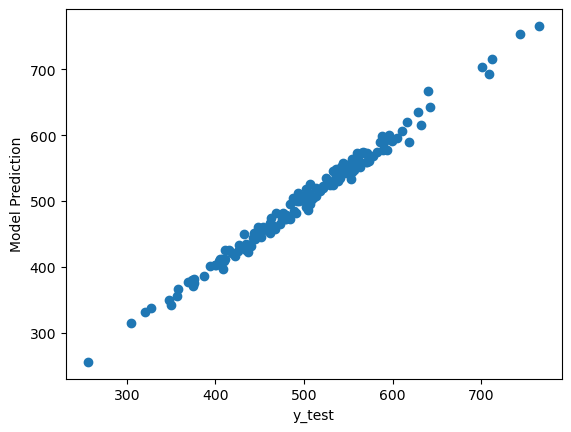

In [27]:
plt.scatter(y_test,prediction_1)
plt.xlabel('y_test')
plt.ylabel('Model Prediction')

**This linear relationship shows that the model did great! I also check the difference between the actual y_test and predictions called 'residuals'. For a good model, the residuals should be normally distributed.**

C:\Users\poory\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Yearly Amount Spent', ylabel='Density'>

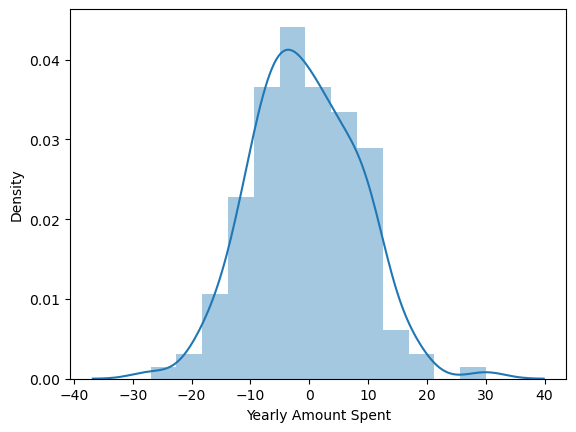

In [28]:
sns.distplot(y_test-prediction_1)

**Other metrics in evaluating linear regression models are Mean Squared error, Mean Absolute Error and R-squared**

In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [31]:
print('MAE :',mean_absolute_error(y_test,prediction_1))
print('MSE :',mean_squared_error(y_test,prediction_1))
print('R-squard :',r2_score(y_test,prediction_1))

MAE : 7.22814865343083
MSE : 79.81305165097457
R-squard : 0.9890046246741234


**R-quared in very close to 1 which means the model was very efficient. It makes sense according to the distribution of the residuals and scatter plot of actual ys and predictions.**

### Model 2: Decision Tree

In [33]:
from sklearn.tree import DecisionTreeRegressor

In [34]:
DTR = DecisionTreeRegressor()
DTR.fit(X_train,y_train)
prediction_2 = DTR.predict(X_test)

Text(0, 0.5, 'Model Prediction')

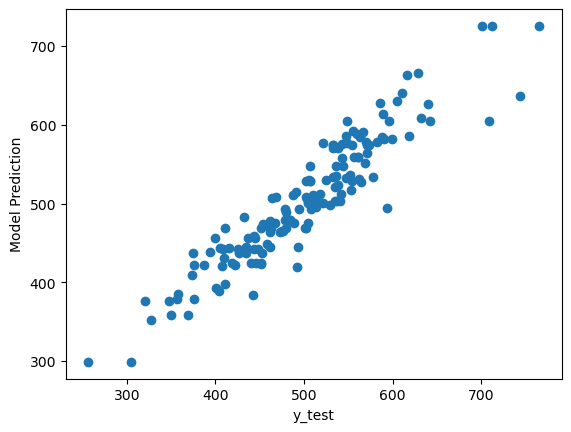

In [36]:
plt.scatter(y_test,prediction_2)
plt.xlabel('y_test')
plt.ylabel('Model Prediction')

C:\Users\poory\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Yearly Amount Spent', ylabel='Density'>

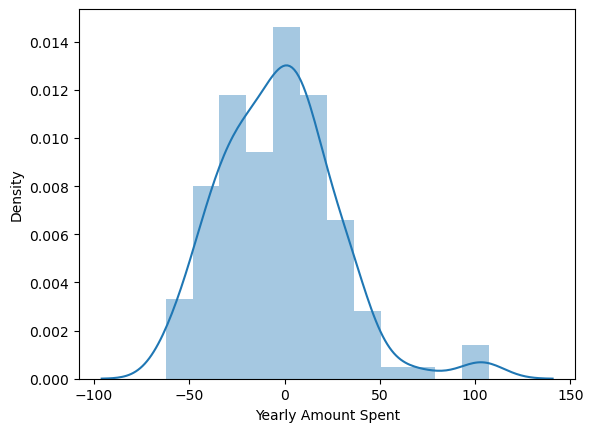

In [41]:
sns.distplot(y_test-prediction_2)

In [42]:
print('MAE :',mean_absolute_error(y_test,prediction_2))
print('MSE :',mean_squared_error(y_test,prediction_2))
print('R-squard :',r2_score(y_test,prediction_2))

MAE : 23.557147956168066
MSE : 932.9938327356397
R-squard : 0.8714669198150973


**Compared to linear regression, decision tree did poorly. Random Forest is a better option to try since it avoids overfitting on the training data. This is an issue that decision trees are very notorious for!** 

### Model 3: Random Forest

In [43]:
from sklearn.ensemble import RandomForestRegressor

In [44]:
RFR = RandomForestRegressor(n_estimators=200)
RFR.fit(X_train,y_train)
prediction_3 = RFR.predict(X_test)

Text(0, 0.5, 'Model Prediction')

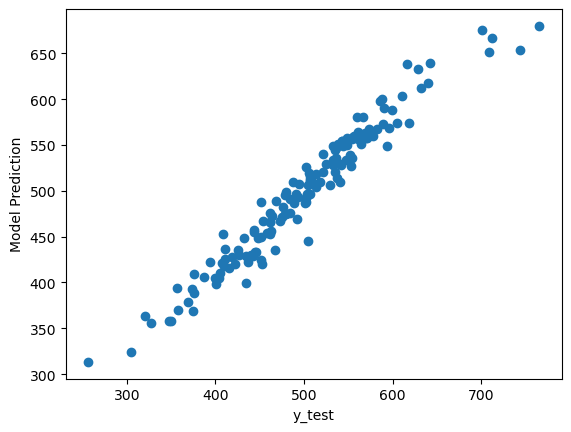

In [45]:
plt.scatter(y_test,prediction_3)
plt.xlabel('y_test')
plt.ylabel('Model Prediction')

C:\Users\poory\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Yearly Amount Spent', ylabel='Density'>

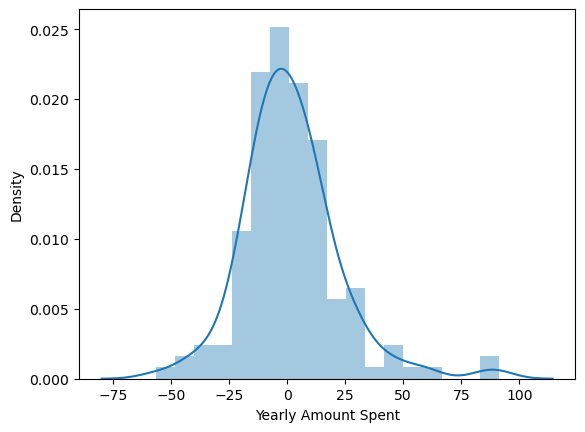

In [47]:
sns.distplot(y_test-prediction_3)

In [48]:
print('MAE :',mean_absolute_error(y_test,prediction_3))
print('MSE :',mean_squared_error(y_test,prediction_3))
print('R-squard :',r2_score(y_test,prediction_3))

MAE : 14.954066633684848
MSE : 441.9386052259925
R-squard : 0.9391167141847424


### Model 4: eXtreme Gradient Boost

In [49]:
from xgboost import XGBRegressor

In [50]:
XGBR = XGBRegressor()
XGBR.fit(X_train,y_train)
prediction_4 = XGBR.predict(X_test)

Text(0, 0.5, 'Model Prediction')

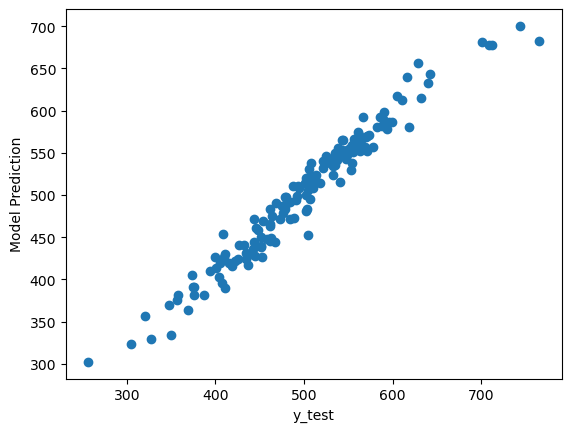

In [51]:
plt.scatter(y_test,prediction_4)
plt.xlabel('y_test')
plt.ylabel('Model Prediction')

C:\Users\poory\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Yearly Amount Spent', ylabel='Density'>

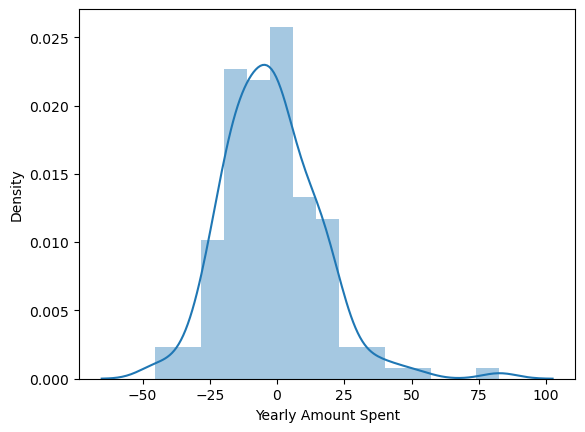

In [52]:
sns.distplot(y_test-prediction_4)

In [53]:
print('MAE :',mean_absolute_error(y_test,prediction_3))
print('MSE :',mean_squared_error(y_test,prediction_3))
print('R-squard :',r2_score(y_test,prediction_3))

MAE : 14.954066633684848
MSE : 441.9386052259925
R-squard : 0.9391167141847424


### Model 5: Artificial Neural Network (ANN)

In [54]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [55]:
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [71]:
model = Sequential()

model.add(Dense(50,input_shape=(X_train.shape[1],),activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(25,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [72]:
model.fit(X_train,y_train,epochs=100,validation_data=(X_test,y_test))

Epoch 1/100
11/11 [==============================] - 1s 13ms/step - loss: 250035.6406 - val_loss: 252625.7656
Epoch 2/100
11/11 [==============================] - 0s 5ms/step - loss: 241975.3125 - val_loss: 245253.9531
Epoch 3/100
11/11 [==============================] - 0s 5ms/step - loss: 233497.6875 - val_loss: 233204.9062
Epoch 4/100
11/11 [==============================] - 0s 5ms/step - loss: 221830.7812 - val_loss: 217918.2188
Epoch 5/100
11/11 [==============================] - 0s 4ms/step - loss: 204672.7031 - val_loss: 197275.7500
Epoch 6/100
11/11 [==============================] - 0s 5ms/step - loss: 181773.1250 - val_loss: 171328.3125
Epoch 7/100
11/11 [==============================] - 0s 4ms/step - loss: 154997.7969 - val_loss: 140327.2031
Epoch 8/100
11/11 [==============================] - 0s 5ms/step - loss: 129114.3672 - val_loss: 107516.9609
Epoch 9/100
11/11 [==============================] - 0s 3ms/step - loss: 100684.7109 - val_loss: 75656.3125
Epoch 10/100
11/11 

11/11 [==============================] - 0s 3ms/step - loss: 27918.5352 - val_loss: 7033.7656
Epoch 78/100
11/11 [==============================] - 0s 3ms/step - loss: 26324.1426 - val_loss: 8660.8398
Epoch 79/100
11/11 [==============================] - 0s 3ms/step - loss: 28696.3398 - val_loss: 8140.7534
Epoch 80/100
11/11 [==============================] - 0s 3ms/step - loss: 30329.3965 - val_loss: 7473.4258
Epoch 81/100
11/11 [==============================] - 0s 3ms/step - loss: 25959.7031 - val_loss: 8500.7520
Epoch 82/100
11/11 [==============================] - 0s 3ms/step - loss: 27008.3516 - val_loss: 8201.4814
Epoch 83/100
11/11 [==============================] - 0s 3ms/step - loss: 28460.1992 - val_loss: 6821.4800
Epoch 84/100
11/11 [==============================] - 0s 3ms/step - loss: 30071.4941 - val_loss: 7605.0767
Epoch 85/100
11/11 [==============================] - 0s 3ms/step - loss: 27057.5879 - val_loss: 8319.3945
Epoch 86/100
11/11 [==============================

<AxesSubplot:>

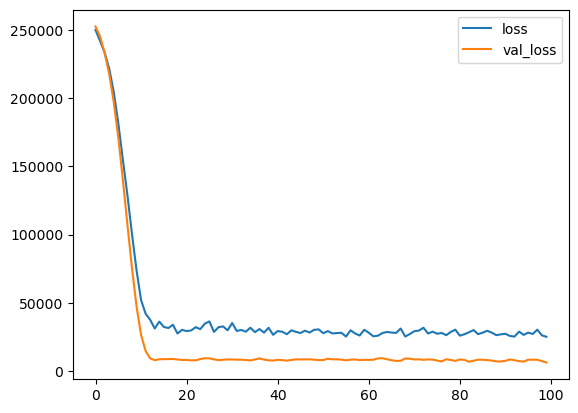

In [73]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [74]:
prediction_5 = model.predict(X_test)

5/5 [==============================] - 0s 4ms/step


Text(0, 0.5, 'Model Prediction')

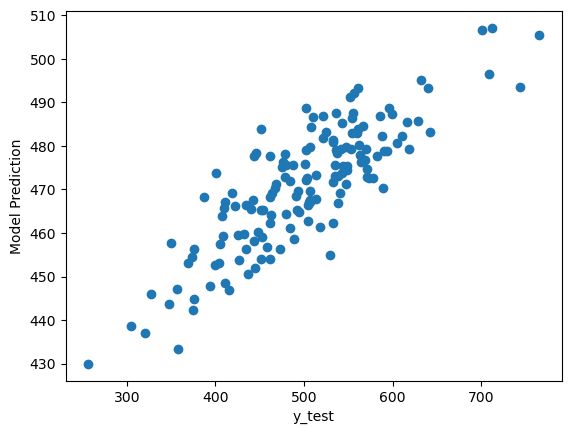

In [75]:
plt.scatter(y_test,prediction_5)
plt.xlabel('y_test')
plt.ylabel('Model Prediction')

C:\Users\poory\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

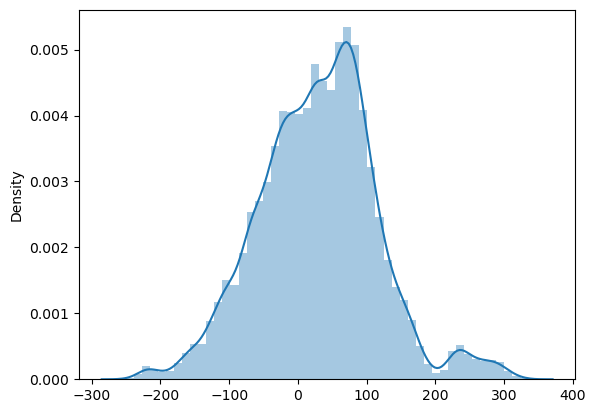

In [76]:
sns.distplot(y_test-prediction_5)

In [77]:
print('MAE :',mean_absolute_error(y_test,prediction_5))
print('MSE :',mean_squared_error(y_test,prediction_5))
print('R-squard :',r2_score(y_test,prediction_5))

MAE : 62.48420209645471
MSE : 6300.110439697616
R-squard : 0.13207078985178877


**It seems that neural networks do worse in this regression problem. I pick the simplest model, linear regression, as the best one.**

## Conclusion
We still want to figure out the answer to the original question, do we focus our efforst on mobile app or website development? Or maybe that doesn't even really matter, and Membership Time is what is really important.  Let's see if we can interpret the coefficients at all to get an idea.

In [78]:
COEFFICIENTS

,coefficient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


As I mentioned before, general interpretation of this data frame could be as follows:

- Holding all other features fixed, a 1 unit increase in **Avg. Session Length** is associated with an **increase of 25.98 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Time on App** is associated with an **increase of 38.59 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Time on Website** is associated with an **increase of 0.19 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Length of Membership** is associated with an **increase of 61.27 total dollars spent**.

**Should the company focus more on their mobile app or on their website?**

The answer completely depends on the way we think about the problem: Develop the Website to catch up to the performance of the mobile app, or develop the app more since that is what is working better. This sort of answer really depends on the other factors going on at the company. Maybe this is a good idea to explore the relationship between Length of Membership and Time on App or Time on the Website and then announce the final conclusion!